### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 3
### Due: Monday, Feb 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 14th.

---

## Problem 1

Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

## Problem 2

The data in hw3_populations.txt (source: scipy-lectures.org) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:


create a Python script to

1. plot hw3_populations.txt (using matlab)


2. calculate and output:

    a) The mean, median and std of the populations of each species for the years in the period.
    
    b) The year each species had the largest population.
    
    c) The species that has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
    
    d) The years were any of the populations is above 50000. (Hint: comparisons and np.any)
    
    e) The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
    
    f) Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).



### Solution



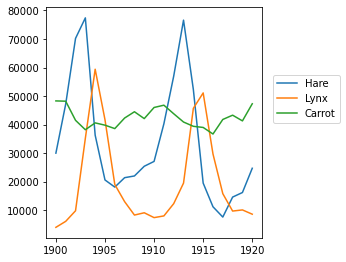

In [44]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('hw3_populations.txt')
year, hares, lynxes, carrots = data.T 
years = data[:, 0]
populations = data[:, 1:]

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [40]:
hare = []
lynx = []
carrot = []

for lst in populations:
    hare.append(lst[0])
    lynx.append(lst[1])
    carrot.append(lst[2])

hare_mean = np.mean(hare)
print('Mean of hare is', int(hare_mean))

lynx_mean = np.mean(lynx)
print('Mean of lynx is', int(lynx_mean))

carrot_mean = np.mean(carrot)
print('Mean of carrot is', int(carrot_mean))

print()

hare_median = np.median(hare)
print('Median of hare is', int(hare_median))

lynx_median = np.median(lynx)
print('Median of lynx is', int(lynx_median))

carrot_median = np.median(carrot)
print('Median of carrot is', int(carrot_median))

print()

hare_sd = np.std(hare)
print('Standard deviation of hare is', int(hare_sd))

lynx_sd = np.std(lynx)
print('Standard deviation of lynx is', int(lynx_sd))

carrot_sd = np.std(carrot)
print('Standard deviation of carrot is', int(carrot_sd))

Mean of hare is 34080
Mean of lynx is 20166
Mean of carrot is 42400

Median of hare is 25400
Median of lynx is 12300
Median of carrot is 41800

Standard deviation of hare is 20897
Standard deviation of lynx is 16254
Standard deviation of carrot is 3322


In [43]:
hare_position = hare.index(max(hare))
hare_year = years[hare_position]
print('Hare has largest population in', int(hare_year))

lynx_position = lynx.index(max(lynx))
lynx_year = years[lynx_position]
print('Lynx has largest population in', int(lynx_year))

carrot_position = carrot.index(max(carrot))
carrot_year = years[carrot_position]
print('Carrot has largest population in', int(carrot_year))

Hare has largest population in 1903
Lynx has largest population in 1904
Carrot has largest population in 1900


In [53]:
species_lst = ['Hare', 'Lynx', 'Carrot']
max_lst = []
max_species = []
n = 1900

sorted_lst = np.argsort(populations)
for lst in sorted_lst:
    max_lst.append(lst[2])

for num in max_lst:
    max_species.append(species_lst[num])

for i in range(len(max_species)):
    print(f'{n}: {max_species[i]}')
    n += 1  

1900: Carrot
1901: Carrot
1902: Hare
1903: Hare
1904: Lynx
1905: Lynx
1906: Carrot
1907: Carrot
1908: Carrot
1909: Carrot
1910: Carrot
1911: Carrot
1912: Hare
1913: Hare
1914: Hare
1915: Lynx
1916: Carrot
1917: Carrot
1918: Carrot
1919: Carrot
1920: Carrot


In [84]:
for i in range(len(populations)):
    if np.any(populations[i] > 50000):
        print(int(years[i]))
print('The above years have any of the populations above 50000')

1902
1903
1904
1912
1913
1914
1915
The above years have any of the populations above 50000


In [98]:
hare_lst = np.argsort(hare)
print('Hare has its lowest population in', int(years[int(hare_lst[0])]))
print('Hare has its second lowest population in', int(years[int(hare_lst[1])]))
        
print()

lynx_lst = np.argsort(lynx)
print('Lynx has its lowest population in', int(years[int(lynx_lst[0])]))
print('Lynx has its second lowest population in', int(years[int(lynx_lst[1])]))

print()

carrot_lst = np.argsort(carrot)
print('Carrot has its lowest population in', int(years[int(carrot_lst[0])]))
print('Carrot has its second lowest population in', int(years[int(carrot_lst[1])]))

Hare has its lowest population in 1917
Hare has its second lowest population in 1916

Lynx has its lowest population in 1900
Lynx has its second lowest population in 1901

Carrot has its lowest population in 1916
Carrot has its second lowest population in 1903


Correlation coefficients = 
[[ 1.         -0.05136253]
 [-0.05136253  1.        ]]


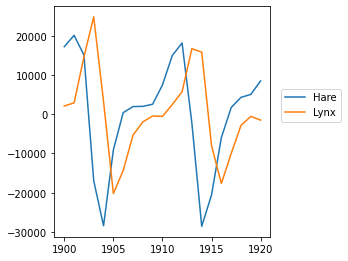

In [116]:
plt.axes([0.2, 0.1, 0.5, 0.8])

a = np.gradient(hare)
plt.plot(year, a)

b = np.gradient(lynx)
plt.plot(year, b)

plt.legend(('Hare', 'Lynx'), loc=(1.05, 0.5))
print('Correlation coefficients = ')
print(np.corrcoef(a, b))